In [ ]:
import src.settings as settings
settings.init()
config_values = settings.config_values
historical_data = settings.historical_data
train_data = settings.train_data
test_data = settings.test_data
returns = settings.returns

import yaml
import warnings
warnings.filterwarnings('ignore')
from src.data_collection import collect_coins_data, load_data
from src.signals_creation import compute_signal, get_returns_data, get_rsi
from src.signals_evaluation import compute_metrics
from src.normalizations import convert_to_weights
from src.visualisation import plot_pnl
from src.signals_optimization import optimize_signal

In [2]:
study = optimize_signal("rsi")


[I 2023-07-02 19:56:46,571] A new study created in memory with name: no-name-114a7fda-8aec-4f99-a868-d67ccd49c621
[I 2023-07-02 19:56:48,528] Trial 0 finished with value: -0.3408753609934682 and parameters: {'lag': 1, 'normalization_choice': 4, 'window': 5}. Best is trial 0 with value: -0.3408753609934682.
[I 2023-07-02 19:56:50,280] Trial 1 finished with value: -0.5076877251313366 and parameters: {'lag': 6, 'normalization_choice': 4, 'window': 17}. Best is trial 0 with value: -0.3408753609934682.
[I 2023-07-02 19:56:51,913] Trial 2 finished with value: -0.8463377444701118 and parameters: {'lag': 8, 'normalization_choice': 4, 'window': 16}. Best is trial 0 with value: -0.3408753609934682.


In [3]:
study.trials_dataframe()["params_window"].max()

25

In [4]:
type(study)

optuna.study.study.Study

In [3]:
study.best_params

{'lag': 3, 'normalization_choice': 4, 'window': 6}

In [4]:
signal = compute_signal("rsi", train_data, **study.best_params)
metrics = compute_metrics(signal, returns)

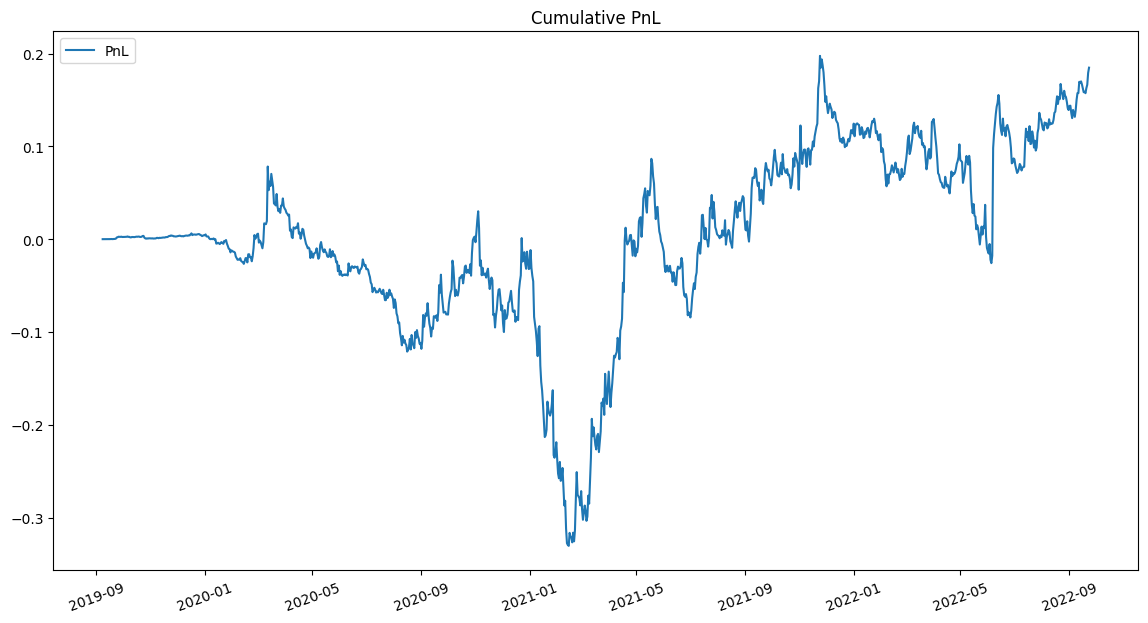

In [5]:
plot_pnl(metrics["pnl_series"])

In [6]:
signal.abs().sum(axis=1)

timestamp
2019-09-08 02:00:00    0.0
2019-09-09 02:00:00    0.0
2019-09-10 02:00:00    0.0
2019-09-11 02:00:00    0.0
2019-09-12 02:00:00    0.0
                      ... 
2022-09-19 02:00:00    1.0
2022-09-20 02:00:00    1.0
2022-09-21 02:00:00    1.0
2022-09-22 02:00:00    1.0
2022-09-23 02:00:00    1.0
Length: 1112, dtype: float64

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,UNFI,REEF,RVN,SFP,XEM,COTI,CHR,MANA,ALICE,HBAR
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-09-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-10 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-12 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19 02:00:00,0.008016,-0.011288,0.007411,0.045280,0.005210,0.004742,0.008469,0.001148,0.037930,0.028202,...,-0.006880,0.050987,0.026821,0.006741,-0.003830,0.016083,-0.009771,-0.007387,-0.015769,0.002946
2022-09-20 02:00:00,0.004124,-0.009753,0.000813,0.055369,0.002081,-0.001004,-0.002554,-0.000712,0.023663,0.037898,...,-0.004364,0.044403,0.022758,0.006242,-0.000244,0.020233,-0.002966,-0.001517,-0.019165,0.003579
2022-09-21 02:00:00,-0.003895,-0.011575,0.006471,0.052951,0.010890,0.000233,-0.002761,-0.002313,0.011315,0.051209,...,-0.005437,0.032817,0.017760,0.004728,-0.001050,0.026223,-0.009579,-0.004601,-0.017973,0.001683


In [7]:
signal.tail()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,UNFI,REEF,RVN,SFP,XEM,COTI,CHR,MANA,ALICE,HBAR
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-19 02:00:00,0.507127,-0.714133,0.468848,2.864510,0.329623,0.299971,0.535790,0.072637,2.399538,1.784134,...,-0.435230,3.225582,1.696775,0.426483,-0.242309,1.017475,-0.618136,-0.467327,-0.997609,0.186399
2022-09-20 02:00:00,0.246203,-0.582295,0.048529,3.305658,0.124234,-0.059928,-0.152453,-0.042528,1.412745,2.262579,...,-0.260536,2.650969,1.358672,0.372653,-0.014576,1.207932,-0.177102,-0.090584,-1.144191,0.213691
2022-09-21 02:00:00,-0.239408,-0.711487,0.397789,3.254768,0.669365,0.014299,-0.169693,-0.142194,0.695519,3.147699,...,-0.334211,2.017163,1.091679,0.290627,-0.064564,1.611859,-0.588829,-0.282817,-1.104746,0.103424
2022-09-22 02:00:00,-0.278447,-0.878337,0.225419,3.113771,0.026244,0.019882,-0.183597,-0.169513,0.647647,2.159719,...,-0.089291,2.857977,1.288619,0.169424,-0.222503,2.018266,-0.567198,-0.436572,-1.375525,0.207097
2022-09-23 02:00:00,-0.064737,-0.957055,0.392659,3.253576,-0.587885,-0.126457,-0.425989,-0.860361,0.482974,2.552653,...,-0.442482,1.947021,0.396170,0.215312,0.072295,1.538561,-0.607113,-0.321617,-1.138239,0.185716
